In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
event_df=pd.read_csv('event.csv')
click_test_df=pd.read_csv('click_test.csv')
click_train_df=pd.read_csv('click_train.csv')
creative_df=pd.read_csv('creative.csv')
creative_title_df=pd.read_csv('creative_title.csv')

In [3]:
creative_image_df=pd.read_csv('creative_image.csv')

In [4]:
event_df.isnull().sum()

displayId    0
timestamp    0
docId        0
widgetId     0
userId       0
device       0
OS           0
browser      0
dtype: int64

In [5]:
click_test_df.isnull().sum()

displayId     0
creativeId    0
dtype: int64

In [6]:
creative_image_df.duplicated(keep='first')
creative_title_df.duplicated(keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
18117    False
18118    False
18119    False
18120    False
18121    False
Length: 18122, dtype: bool

In [7]:
creative_image_df

,creativeId,imageFeatures
0,7867,"[0.0524589940905571, 0.0, 0.04262353479862213,..."
1,7866,"[0.0032160670962184668, 0.1444239318370819, 0...."
2,7865,"[0.027210379019379616, 0.0, 0.5133526921272278..."
3,7863,"[0.0013980235671624541, 0.0, 0.0, 0.0455568209..."
4,7862,"[0.02426762878894806, 0.026081759482622147, 0...."
...,...,...
3251,13,"[0.14816689491271973, 0.04346756637096405, 1.3..."
3252,11,"[0.04297146946191788, 0.01642996445298195, 0.0..."
3253,8,"[0.15623298287391663, 0.00098716514185071, 0.0..."
3254,7,"[0.10627733916044235, 0.08754178136587143, 3.3..."


In [8]:
creative_title_df

,creativeId,wordId
0,6,24
1,6,25
2,6,26
3,6,27
4,6,28
...,...,...
18117,7867,11
18118,7867,209
18119,7867,245
18120,7867,1992


In [9]:
event_df

,displayId,timestamp,docId,widgetId,userId,device,OS,browser
0,4706262,1578429005696,3543873,6262,2688642,0,0,0
1,4706267,1578429007726,6245475,607,2688641,1,3,0
2,4706260,1578429012060,4416499,11458,2688638,0,0,1
3,4706255,1578429017218,6246028,9358,1962852,0,0,0
4,4706256,1578429021388,5327047,9358,2687719,0,0,0
...,...,...,...,...,...,...,...,...
1083066,243935,1579984124711,104462,12551,44,0,0,0
1083067,243775,1579984124711,104462,12551,44,0,0,0
1083068,243745,1579984124711,104462,12551,44,0,0,0
1083069,243931,1579984145239,10506468,6951,30,0,0,0


## ➡️&nbsp; EDA

**Find the top five advertisers with the most number of ads. How many advertisement campaigns does each one have?**

In [10]:
camping_df=creative_df.advertiserId.value_counts().head(5)
camping_df

8414    424
6578    181
2167    137
7903    109
6973    106
Name: advertiserId, dtype: int64

In [11]:
count_camp=creative_df.groupby(by=['advertiserId']).campaignId.count().reset_index(name='count_camp')
count_camp

,advertiserId,count_camp
0,1,1
1,39,3
2,85,1
3,100,1
4,202,6
...,...,...
208,10494,1
209,10522,10
210,10556,10
211,10746,1


### Which webpage (`docID`) received the biggest number of clicks? Which ads were displayed on that page?

In [12]:
event_df

,displayId,timestamp,docId,widgetId,userId,device,OS,browser
0,4706262,1578429005696,3543873,6262,2688642,0,0,0
1,4706267,1578429007726,6245475,607,2688641,1,3,0
2,4706260,1578429012060,4416499,11458,2688638,0,0,1
3,4706255,1578429017218,6246028,9358,1962852,0,0,0
4,4706256,1578429021388,5327047,9358,2687719,0,0,0
...,...,...,...,...,...,...,...,...
1083066,243935,1579984124711,104462,12551,44,0,0,0
1083067,243775,1579984124711,104462,12551,44,0,0,0
1083068,243745,1579984124711,104462,12551,44,0,0,0
1083069,243931,1579984145239,10506468,6951,30,0,0,0


In [13]:
click_train_df

,displayId,creativeId,clicked
0,1210227,7182,0
1,1210227,7125,0
2,1210227,7181,0
3,1210227,535,0
4,1210227,7174,1
...,...,...,...
3642239,4706267,5279,0
3642240,4706267,5271,0
3642241,4706267,5316,0
3642242,4706267,237,0


In [14]:
merged_event_click=event_df.merge(click_train_df,on='displayId',how='inner')
merged_event_click

,displayId,timestamp,docId,widgetId,userId,device,OS,browser,creativeId,clicked
0,4706262,1578429005696,3543873,6262,2688642,0,0,0,6,1
1,4706262,1578429005696,3543873,6262,2688642,0,0,0,15,0
2,4706262,1578429005696,3543873,6262,2688642,0,0,0,3610,0
3,4706267,1578429007726,6245475,607,2688641,1,3,0,5279,0
4,4706267,1578429007726,6245475,607,2688641,1,3,0,5271,0
...,...,...,...,...,...,...,...,...,...,...
3642239,1328991,1579599210211,20305,10849,781797,0,0,0,7181,0
3642240,1328991,1579599210211,20305,10849,781797,0,0,0,7182,1
3642241,1328991,1579599210211,20305,10849,781797,0,0,0,7178,0
3642242,1328892,1579599211448,233,6746,781793,0,2,2,3614,0


In [15]:
count_click_in_webpage=merged_event_click.groupby(by=['docId','creativeId']).clicked.sum().reset_index(name='click_count_by_docid').sort_values(['click_count_by_docid'], ascending=False)
count_click_in_webpage

,docId,creativeId,click_count_by_docid
74284,8116,6192,575
74416,8116,6515,565
1468568,8327976,3652,499
74513,8116,6703,459
74078,8116,5780,436
...,...,...,...
842555,6142639,70,0
281672,94909,142,0
842553,6142639,24,0
281673,94909,436,0


### Using `event.csv` and `click_train.csv` tables, find the top 100 users who have clicked on ads more that any other person. What type of device they were using?

In [16]:
count_most_clicked_user=merged_event_click.groupby(by=['userId','device']).clicked.sum().reset_index(name='click_count_by_userid').sort_values(['click_count_by_userid'], ascending=False)
count_most_clicked_user.head(100)

,userId,device,click_count_by_userid
17068,163374,1,252
2420,26033,1,202
731,8409,1,202
249904,1356929,1,153
7157,80354,1,150
...,...,...,...
20911,195597,1,22
72714,766107,1,22
130178,949735,1,22
218832,1262713,1,22


## ➡️ Coversion Rate

**For each `creativeId` (a unique ID associated with each ad/creative) calculate how many times on average they were clicked on. We refer to this rate as "conversion rate". Draw a histogram of the conversion rates for all creativeId's.**

In [17]:
creative_df

,creativeId,campaignId,advertiserId
0,7867,5918,8414
1,7866,5918,8414
2,7865,5918,8414
3,7863,8343,8414
4,7862,8343,8414
...,...,...,...
3251,13,1402,3073
3252,11,4493,378
3253,8,4458,4187
3254,7,6471,5175


In [18]:
click_train_df

,displayId,creativeId,clicked
0,1210227,7182,0
1,1210227,7125,0
2,1210227,7181,0
3,1210227,535,0
4,1210227,7174,1
...,...,...,...
3642239,4706267,5279,0
3642240,4706267,5271,0
3642241,4706267,5316,0
3642242,4706267,237,0


In [19]:
merged_creative_click=creative_df.merge(click_train_df,on='creativeId')
merged_creative_click

,creativeId,campaignId,advertiserId,displayId,clicked
0,7182,3402,7579,1210227,0
1,7182,3402,7579,1248098,0
2,7182,3402,7579,1271266,1
3,7182,3402,7579,1285917,1
4,7182,3402,7579,1300779,0
...,...,...,...,...,...
3642239,6,7855,290,4705998,1
3642240,6,7855,290,4706064,0
3642241,6,7855,290,4706069,0
3642242,6,7855,290,4706147,1


In [20]:
sum_click_ads=merged_creative_click.groupby(by='creativeId').clicked.sum()
sum_click_ads

creativeId
6       6945
7        610
8       2463
11       416
13       372
        ... 
7177      20
7178      85
7179      31
7181     513
7182     709
Name: clicked, Length: 2616, dtype: int64

In [21]:
count_click_ads=merged_creative_click.groupby(by='creativeId').clicked.count()
count_click_ads

creativeId
6       22691
7        4783
8       10403
11       3501
13       2442
        ...  
7177       68
7178      448
7179      219
7181     1988
7182     2437
Name: clicked, Length: 2616, dtype: int64

In [22]:
conversion_rate=sum_click_ads/count_click_ads

In [23]:
conv_rate_df=conversion_rate.reset_index(name='conv_rate')
conv_rate_df

,creativeId,conv_rate
0,6,0.306068
1,7,0.127535
2,8,0.236759
3,11,0.118823
4,13,0.152334
...,...,...
2611,7177,0.294118
2612,7178,0.189732
2613,7179,0.141553
2614,7181,0.258048


### For ads displayed to users with different device type (`device` in `event.csv`) calculated coversion rate? Do you observe any noticable difference between these groups?

In [24]:
event_df

,displayId,timestamp,docId,widgetId,userId,device,OS,browser
0,4706262,1578429005696,3543873,6262,2688642,0,0,0
1,4706267,1578429007726,6245475,607,2688641,1,3,0
2,4706260,1578429012060,4416499,11458,2688638,0,0,1
3,4706255,1578429017218,6246028,9358,1962852,0,0,0
4,4706256,1578429021388,5327047,9358,2687719,0,0,0
...,...,...,...,...,...,...,...,...
1083066,243935,1579984124711,104462,12551,44,0,0,0
1083067,243775,1579984124711,104462,12551,44,0,0,0
1083068,243745,1579984124711,104462,12551,44,0,0,0
1083069,243931,1579984145239,10506468,6951,30,0,0,0


In [25]:
click_train_df

,displayId,creativeId,clicked
0,1210227,7182,0
1,1210227,7125,0
2,1210227,7181,0
3,1210227,535,0
4,1210227,7174,1
...,...,...,...
3642239,4706267,5279,0
3642240,4706267,5271,0
3642241,4706267,5316,0
3642242,4706267,237,0


In [26]:
merged_click_event=click_train_df.merge(event_df,on='displayId')
merged_click_event

,displayId,creativeId,clicked,timestamp,docId,widgetId,userId,device,OS,browser
0,1210227,7182,0,1579598863403,420857,9519,782749,0,0,1
1,1210227,7125,0,1579598863403,420857,9519,782749,0,0,1
2,1210227,7181,0,1579598863403,420857,9519,782749,0,0,1
3,1210227,535,0,1579598863403,420857,9519,782749,0,0,1
4,1210227,7174,1,1579598863403,420857,9519,782749,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3642239,4706267,5279,0,1578429007726,6245475,607,2688641,1,3,0
3642240,4706267,5271,0,1578429007726,6245475,607,2688641,1,3,0
3642241,4706267,5316,0,1578429007726,6245475,607,2688641,1,3,0
3642242,4706267,237,0,1578429007726,6245475,607,2688641,1,3,0


In [27]:
counted_by_userId=merged_click_event.groupby(by=['userId','device']).clicked.count().reset_index(name='count_creatived_id')
counted_by_userId

,userId,device,count_creatived_id
0,8,0,4
1,60,0,3
2,70,1,4
3,79,0,7
4,94,0,4
...,...,...,...
646629,2688629,0,4
646630,2688634,0,4
646631,2688638,0,3
646632,2688641,1,5


In [28]:
sum_by_userId=merged_click_event.groupby(by=['userId','device']).clicked.sum().reset_index(name='sum_creatived_id')
sum_by_userId

,userId,device,sum_creatived_id
0,8,0,1
1,60,0,1
2,70,1,1
3,79,0,2
4,94,0,1
...,...,...,...
646629,2688629,0,1
646630,2688634,0,1
646631,2688638,0,1
646632,2688641,1,1


In [29]:
conv_rate=sum_by_userId['sum_creatived_id']/counted_by_userId['count_creatived_id']
sum_by_userId['conv_rate']=conv_rate

In [30]:
conv_rate

0         0.250000
1         0.333333
2         0.250000
3         0.285714
4         0.250000
            ...   
646629    0.250000
646630    0.250000
646631    0.333333
646632    0.200000
646633    0.333333
Length: 646634, dtype: float64

## For ads displayed to users with different operating systems (`OS` in `event.csv`) calculated coversion rate? Do you observe any noticable difference between these groups?

In [31]:
merged_click_event

,displayId,creativeId,clicked,timestamp,docId,widgetId,userId,device,OS,browser
0,1210227,7182,0,1579598863403,420857,9519,782749,0,0,1
1,1210227,7125,0,1579598863403,420857,9519,782749,0,0,1
2,1210227,7181,0,1579598863403,420857,9519,782749,0,0,1
3,1210227,535,0,1579598863403,420857,9519,782749,0,0,1
4,1210227,7174,1,1579598863403,420857,9519,782749,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3642239,4706267,5279,0,1578429007726,6245475,607,2688641,1,3,0
3642240,4706267,5271,0,1578429007726,6245475,607,2688641,1,3,0
3642241,4706267,5316,0,1578429007726,6245475,607,2688641,1,3,0
3642242,4706267,237,0,1578429007726,6245475,607,2688641,1,3,0


In [32]:
count_by_os=merged_click_event.groupby(by='OS').creativeId.count()
count_by_os

OS
0    2286443
1    1193555
2     125237
3      21975
4       4608
5       9873
6        553
Name: creativeId, dtype: int64

In [33]:
sum_by_os=merged_click_event.groupby(by=['OS']).clicked.sum()
sum_by_os

OS
0    553550
1    223298
2     28465
3      4166
4       866
5      1825
6       133
Name: clicked, dtype: int64

In [34]:
os_conversion=sum_by_os.values/count_by_os.values

## ➡️ Coversion Rate Prediction

**Using `creative_image.csv` we would like to predict a creativeId's conversion rate given its image features. Create a feature matrix and a target vector. Each row in feature matrix corresponds to a sample in the dataset and each column is associated with a certain feature that is extracted from ad images.**

In [35]:
from ast import literal_eval

In [36]:
creative_image_df

,creativeId,imageFeatures
0,7867,"[0.0524589940905571, 0.0, 0.04262353479862213,..."
1,7866,"[0.0032160670962184668, 0.1444239318370819, 0...."
2,7865,"[0.027210379019379616, 0.0, 0.5133526921272278..."
3,7863,"[0.0013980235671624541, 0.0, 0.0, 0.0455568209..."
4,7862,"[0.02426762878894806, 0.026081759482622147, 0...."
...,...,...
3251,13,"[0.14816689491271973, 0.04346756637096405, 1.3..."
3252,11,"[0.04297146946191788, 0.01642996445298195, 0.0..."
3253,8,"[0.15623298287391663, 0.00098716514185071, 0.0..."
3254,7,"[0.10627733916044235, 0.08754178136587143, 3.3..."


In [37]:
creative_image_df['imageFeatures']=creative_image_df['imageFeatures'].apply(lambda x: np.array(literal_eval(x)))

In [38]:
conv_rate_df

,creativeId,conv_rate
0,6,0.306068
1,7,0.127535
2,8,0.236759
3,11,0.118823
4,13,0.152334
...,...,...
2611,7177,0.294118
2612,7178,0.189732
2613,7179,0.141553
2614,7181,0.258048


In [39]:
merged_conv_creative_image=creative_image_df.merge(conv_rate_df,on='creativeId')
merged_conv_creative_image

,creativeId,imageFeatures,conv_rate
0,7182,"[0.17772938311100006, 0.6273877620697021, 0.55...",0.290931
1,7181,"[0.27603843808174133, 0.1960456222295761, 0.34...",0.258048
2,7179,"[0.2053901106119156, 0.0146206459030509, 0.0, ...",0.141553
3,7178,"[1.1388229131698608, 0.041852112859487534, 0.0...",0.189732
4,7177,"[0.974502444267273, 0.08183272927999496, 0.077...",0.294118
...,...,...,...
2611,13,"[0.14816689491271973, 0.04346756637096405, 1.3...",0.152334
2612,11,"[0.04297146946191788, 0.01642996445298195, 0.0...",0.118823
2613,8,"[0.15623298287391663, 0.00098716514185071, 0.0...",0.236759
2614,7,"[0.10627733916044235, 0.08754178136587143, 3.3...",0.127535


In [40]:
y=merged_conv_creative_image['conv_rate']
y

0       0.290931
1       0.258048
2       0.141553
3       0.189732
4       0.294118
          ...   
2611    0.152334
2612    0.118823
2613    0.236759
2614    0.127535
2615    0.306068
Name: conv_rate, Length: 2616, dtype: float64

In [41]:
k=[]

for i in merged_conv_creative_image['imageFeatures']:
    k.append(i)

In [42]:
image_features_df=pd.DataFrame(k)
image_features_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.177729,0.627388,0.554075,0.158078,0.000000,0.564610,0.012419,0.289449,0.384751,0.028059,...,0.291895,0.000000,1.638153,0.178412,1.086942,0.109618,3.026506,0.304689,0.195961,0.810012
1,0.276038,0.196046,0.345296,0.002765,0.730500,0.070100,0.512198,0.710233,0.091547,0.095568,...,0.024766,0.006101,0.726778,1.002823,0.455943,0.934827,1.201000,0.000000,0.361049,0.691181
2,0.205390,0.014621,0.000000,0.006130,0.136217,0.007052,0.132421,0.000000,0.000000,0.454989,...,0.063945,0.139984,0.935905,0.000000,0.025835,0.086115,0.043867,0.287675,0.443077,0.018351
3,1.138823,0.041852,0.000385,0.035156,0.377168,0.123878,1.203102,0.024890,0.674865,0.520424,...,0.048359,0.143126,0.506860,1.717038,0.500506,0.601653,0.292321,0.000000,0.811480,0.247876
4,0.974502,0.081833,0.077752,0.101681,0.560510,0.043694,1.515122,0.075695,0.951731,0.551668,...,0.106524,0.061194,0.234053,2.097951,0.974011,1.424949,0.100139,0.000000,0.537639,0.229753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0.148167,0.043468,1.341706,1.226016,0.379946,0.173325,0.401060,0.134567,0.000000,0.011323,...,0.693747,0.011229,0.093873,0.353185,0.941742,0.000000,0.555764,0.223577,0.071369,0.018053
2612,0.042971,0.016430,0.070029,0.000000,0.562984,0.223415,1.144221,0.630494,0.123705,0.154114,...,0.058076,0.099905,1.024207,0.749125,0.017977,1.022663,2.738049,0.022185,0.135937,0.710172
2613,0.156233,0.000987,0.014774,0.207742,0.038036,0.011584,0.449074,0.066243,0.148653,0.325433,...,0.000000,0.000000,0.000000,0.441291,0.193914,0.639011,0.046036,0.000000,0.061070,0.125147
2614,0.106277,0.087542,3.344223,0.645454,1.301556,0.121954,0.000000,0.000000,0.000000,0.049404,...,0.938022,0.733772,0.000000,1.211627,0.486232,0.000000,0.118570,0.079808,0.159126,0.012901


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [44]:
labels = preprocessing.LabelEncoder()

In [45]:
new_y=labels.fit_transform(y)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(image_features_df ,y, test_size=0.20, random_state=42)

In [47]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
2215,0.000000,0.034216,0.335721,0.839962,0.031182,0.063077,0.000000,0.000000,0.000000,0.079825,...,0.133720,0.025712,0.000000,0.118678,0.065320,0.002095,0.963514,0.000000,0.096590,0.000000
49,0.072943,0.001046,0.549923,0.361085,1.094544,0.131399,1.940521,0.101544,0.171142,0.000000,...,0.120426,0.219817,0.299942,0.264121,0.000000,0.019775,0.202811,0.000000,0.134078,0.167408
2377,0.026506,0.589723,0.000706,0.522820,0.233371,0.725563,0.762326,0.000000,0.000000,0.004619,...,0.120177,0.101686,0.032423,1.509226,0.057905,0.036198,0.079826,0.033071,0.182692,0.011022
961,0.047468,0.000000,0.165118,0.085861,0.699866,0.057039,0.846783,0.000000,0.000000,0.603118,...,0.000000,0.140927,0.369464,1.294445,0.086621,0.182466,0.211072,0.000000,0.216951,0.323794
48,0.188608,0.000000,0.000000,0.495130,0.478419,0.085078,0.001720,0.000000,0.240504,0.183248,...,1.144537,0.069424,0.073763,0.499030,0.980005,0.054646,0.382837,0.000000,0.112639,0.138992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.062940,0.000000,0.739206,0.424775,0.596387,0.026133,0.000000,0.128606,0.021328,0.469660,...,0.705395,0.146620,0.279413,0.017347,0.186263,0.402402,0.085602,0.043422,0.376174,0.003610
1095,0.153517,0.000000,0.642560,0.011273,0.881362,0.210740,0.094647,0.020099,0.000000,0.460513,...,0.025730,0.043737,0.000000,0.523799,0.000000,0.000681,0.799922,0.000000,0.309214,0.059629
1130,0.000535,0.070145,0.312584,0.000000,0.166534,0.085410,0.000000,1.134944,0.338137,0.001177,...,0.180039,0.000000,0.013658,0.000000,0.125973,0.592019,0.605787,0.000000,0.017477,0.172255
1294,0.166218,0.104986,1.219944,0.173433,0.525268,0.292788,0.101878,0.184663,0.332258,0.000000,...,0.154275,0.302031,1.703936,0.442961,0.076251,0.007770,0.223864,1.083963,0.634829,0.228528


In [48]:
y_train

2215    0.274597
49      0.166667
2377    0.184464
961     0.200000
48      0.093939
          ...   
1638    0.095890
1095    0.114379
1130    0.066667
1294    0.209440
860     0.035714
Name: conv_rate, Length: 2092, dtype: float64

## Use a linear regression model to predict conversion rate given image features for each creativeId. Evaluate your model's performance using 5-fold cross-validation. Does adding polynomial features boost the performance? Use mean-squared-error as your evaluation metric.

In [49]:
from sklearn.linear_model import LinearRegression

In [69]:
lr=LinearRegression().fit(X_train,y_train)
lr

LinearRegression()

In [70]:
y_pred=model.predict(X_test)

In [71]:
y_pred.shape

(524,)

In [72]:
y_test.shape

(524,)

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
scores = cross_val_score(model, image_features_df, y, cv=5)
scores

array([-0.31064293, -0.12396368, -0.29695122, -0.1472253 , -0.21710367])

In [101]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

In [102]:
metrics.mean_squared_error(y_test, y_pred)

0.012618951442738724

In [103]:
r2_score(y_test, y_pred)

0.04389970251727493

In [77]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
poly=PolynomialFeatures(degree=2)
x_test_poly=poly.fit_transform(X_test)
x_train_poly=poly.fit_transform(X_train)

In [96]:
poly.fit(x_train_poly,y_train)

PolynomialFeatures()

In [85]:
lr_poly=LinearRegression()

In [86]:
lr_poly.fit(x_train_poly,y_train)

LinearRegression()

In [88]:
y_pred_poly=lr_poly.predict(x_test_poly)

In [97]:
metrics.mean_squared_error(y_test, y_pred_poly)

1.4411909715489619e+21

In [104]:
r2_score(y_test, y_pred_poly)

-1.0919473958513989e+23

## Find a subset of image features that contain the most amount of information about the target values. You may use correlation matrix for this purpose

In [105]:
creative_image_df

,creativeId,imageFeatures
0,7867,"[0.0524589940905571, 0.0, 0.04262353479862213,..."
1,7866,"[0.0032160670962184668, 0.1444239318370819, 0...."
2,7865,"[0.027210379019379616, 0.0, 0.5133526921272278..."
3,7863,"[0.0013980235671624541, 0.0, 0.0, 0.0455568209..."
4,7862,"[0.02426762878894806, 0.026081759482622147, 0...."
...,...,...
3251,13,"[0.14816689491271973, 0.04346756637096405, 1.3..."
3252,11,"[0.04297146946191788, 0.01642996445298195, 0.0..."
3253,8,"[0.15623298287391663, 0.00098716514185071, 0.0..."
3254,7,"[0.10627733916044235, 0.08754178136587143, 3.3..."


In [108]:
copy_image_features_df=image_features_df.copy()

In [111]:
copy_image_features_df['conv_rate']=merged_conv_creative_image['conv_rate']

In [112]:
corr_from_copy_image_features_df=copy_image_features_df.corr()
corr_from_copy_image_features_df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,conv_rate
0,1.000000,-0.019656,-0.175173,-0.164901,0.139369,0.002606,0.163621,-0.024905,0.176629,0.091559,...,-0.014076,0.124070,0.086900,0.467776,0.206190,-0.055157,-0.122035,0.239410,0.151680,-0.011540
1,-0.019656,1.000000,0.018067,-0.057304,0.026847,0.163008,-0.049129,0.116941,0.106979,0.001874,...,0.178428,0.210693,0.010067,-0.089737,0.089715,-0.004107,0.130162,0.121438,-0.001369,0.014280
2,-0.175173,0.018067,1.000000,0.253113,0.161895,-0.020215,-0.081099,-0.066752,-0.143991,-0.060281,...,0.014866,-0.089303,0.098613,-0.051873,-0.144355,0.131188,0.182998,-0.043383,-0.135489,0.022890
3,-0.164901,-0.057304,0.253113,1.000000,-0.017889,0.002178,-0.107303,-0.087372,-0.098860,-0.095715,...,-0.027519,-0.155632,-0.072010,-0.007278,-0.184535,0.009430,0.089402,-0.130424,-0.176656,0.020361
4,0.139369,0.026847,0.161895,-0.017889,1.000000,0.115346,0.124689,-0.056717,0.031118,-0.031704,...,0.030564,0.077779,0.100746,0.129173,0.044099,0.078505,0.010797,0.145905,0.000492,-0.027971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,-0.055157,-0.004107,0.131188,0.009430,0.078505,0.092701,-0.090328,0.163481,-0.072761,-0.038861,...,-0.130674,0.080121,0.089035,0.063152,0.038695,1.000000,0.004576,-0.033707,0.096417,-0.051516
509,-0.122035,0.130162,0.182998,0.089402,0.010797,0.086305,-0.131313,0.118744,0.089760,-0.085346,...,0.006727,0.086498,-0.111465,-0.112674,-0.094108,0.004576,1.000000,-0.078423,-0.016896,0.061816
510,0.239410,0.121438,-0.043383,-0.130424,0.145905,0.096603,0.104135,-0.031019,0.086263,0.136516,...,0.170455,0.204011,0.061594,0.088655,0.090922,-0.033707,-0.078423,1.000000,0.144691,0.069955
511,0.151680,-0.001369,-0.135489,-0.176656,0.000492,-0.016203,0.025793,0.015192,0.054855,0.055361,...,-0.049948,0.155016,0.081404,0.054284,0.368371,0.096417,-0.016896,0.144691,1.000000,0.012972


In [123]:
np.sort(corr_from_copy_image_features_df['conv_rate'].values)[-2]

0.15994696315592044

## Apply PCA on image features. Plot a diagram to depict variance accross each calculated principle componenet. Choose a few principle components along which image features has to larget variance.

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
scaler=StandardScaler()

In [127]:
scaler.fit(image_features_df)

StandardScaler()

In [128]:
scaled_data=scaler.transform(image_features_df)
scaled_data

array([[-0.27175384,  1.38712053,  0.17894426, ...,  0.57031114,
        -0.33581328,  1.13259465],
       [-0.02134625,  0.12526903, -0.11815833, ..., -0.4498044 ,
         0.2663916 ,  0.86020484],
       [-0.20129791, -0.40547295, -0.6095326 , ...,  0.51334672,
         0.56561377, -0.68208643],
       ...,
       [-0.32650832, -0.44535643, -0.58850845, ..., -0.4498044 ,
        -0.82786733, -0.43728309],
       [-0.45375268, -0.19214892,  4.14947049, ..., -0.18260262,
        -0.47017734, -0.69458005],
       [-0.72445666, -0.44824429, -0.53872157, ...,  0.77675207,
         0.26034447, -0.72415187]])

In [129]:
from sklearn.decomposition import PCA

In [130]:
pca = PCA(n_components=2)

In [131]:
x_pca = pca.fit_transform(scaled_data)
x_pca

array([[ 10.06104663,   1.29857185],
       [  4.45822986,  -0.21056601],
       [ 16.69539805,  15.47129605],
       ...,
       [-10.29593703,  -1.85254658],
       [ -6.83405704,   2.1911963 ],
       [ -7.33245921,   4.76907171]])

In [132]:
scaled_data.shape

(2616, 512)

In [133]:
x_pca.shape

(2616, 2)

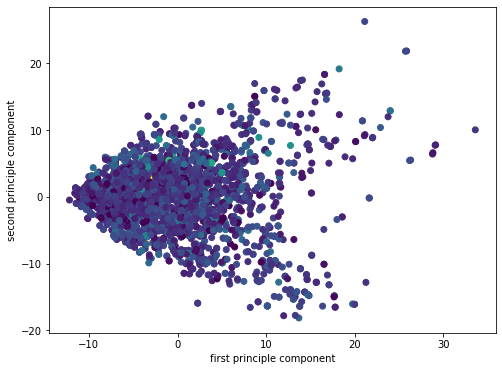

In [137]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=merged_conv_creative_image[['conv_rate']].values)
plt.xlabel('first principle component')
plt.ylabel('second principle component');